   # Estudio Plotly 

## Importar librerias


In [178]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

In [ ]:
path = kagglehub.dataset_download("emonsharkar/python-learning-and-exam-performance-dataset")
df = pd.read_csv(os.path.join(path, os.listdir(path)[0]))

student_id  age   country prior_programming_experience  weeks_in_course  \
0           1   54  Pakistan                     Beginner               12   
1           2   44   Nigeria                          NaN               15   
2           3   30     India                 Intermediate                5   
3           4   23   Nigeria                     Beginner                4   
4           5   36        UK                          NaN                3   

   hours_spent_learning_per_week  practice_problems_solved  \
0                           12.2                        60   
1                           14.2                        52   
2                            7.7                        71   
3                            5.6                        64   
4                            3.5                        62   

   projects_completed  tutorial_videos_watched  uses_kaggle  \
0                   1                       24            0   
1                   1                       32            0   
2                   1                       43            0   
3                   2                       40            1   
4                   1                       47            1   

   participates_in_discussion_forums  debugging_sessions_per_week  \
0                                  1                            4   
1                                  0                            5   
2                                  0                            6   
3                                  0                            3   
4                                  0                            3   

   self_reported_confidence_python  final_exam_score  passed_exam  
0                               10              53.8            0  
1                                7              31.9            0  
2                                3              59.4            0  
3                               10              58.8            0  
4                                7              24.8            0

In [60]:
sns.reset_orig()

Text(0.5, 1.0, 'Histograma Age con Seaborn')

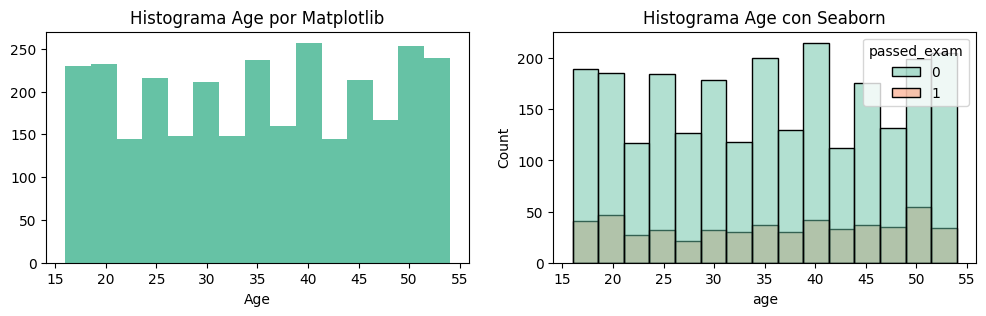

In [75]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2, figsize = (12,3))

axes[0].hist(df["age"], bins = 15)
axes[0].set_title("Histograma Age por Matplotlib")
axes[0].set_xlabel ("Age")

sns.histplot(df, x = "age", ax = axes[1], hue = "passed_exam")
axes[1].set_title("Histograma Age con Seaborn")




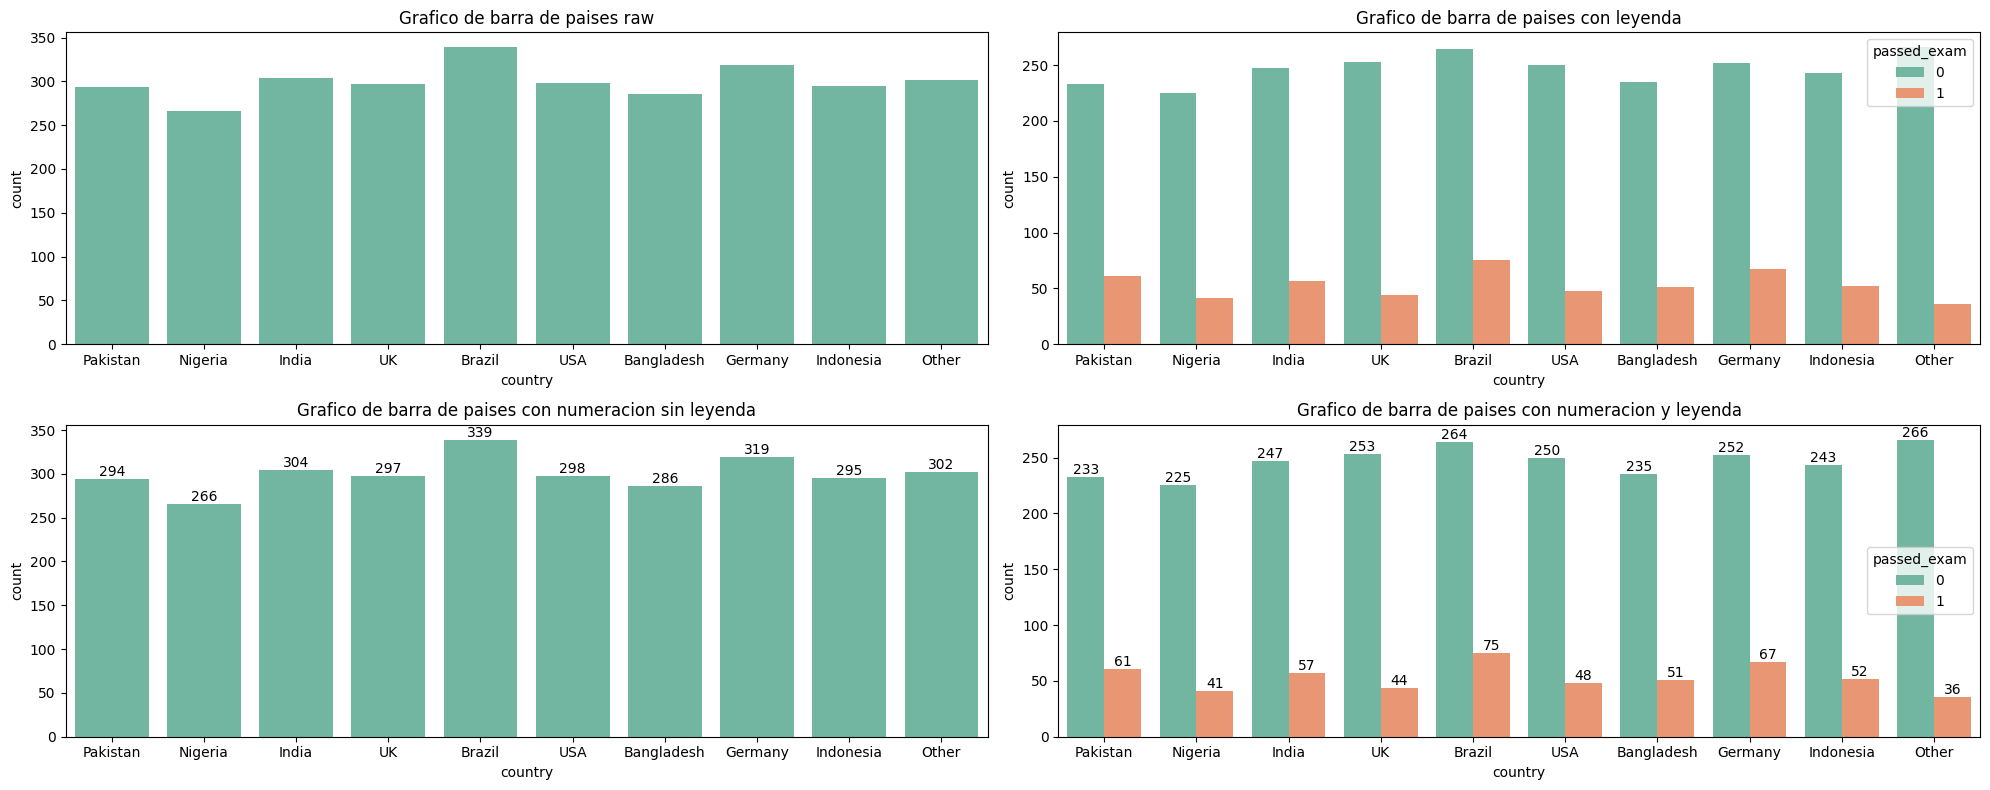

In [172]:
fig, axes = plt.subplots(2,2, figsize = (20,8))
axes = axes.flatten()

sns.countplot(df, x = "country", ax = axes[0])
sns.countplot(df, x = "country", ax = axes[1], hue = "passed_exam")
axes[0].set_title("Grafico de barra de paises raw")
axes[1].set_title("Grafico de barra de paises con leyenda")
axes[2].set_title("Grafico de barra de paises con numeracion sin leyenda")
axes[3].set_title("Grafico de barra de paises con numeracion y leyenda")

sns.countplot(df, x = "country", ax = axes[2])

axes[0]


for  p in axes[2].patches:
    alto = p.get_height()
    centro = p.get_x() + p.get_width()/2
    axes[2].annotate(
        int(alto),
        (centro,alto),
        ha = "center",
        va = "bottom"
    )

sns.countplot(df, x = "country", ax = axes[3], hue = "passed_exam")
for  p in axes[3].patches:
    alto = p.get_height()
    centro = p.get_x() + p.get_width()/2
    if alto != 0 and centro != 0:
        axes[3].annotate(
            int(alto),
            (centro,alto),
            ha = "center",
            va = "bottom"
        )

plt.tight_layout()



<Axes: xlabel='country'>

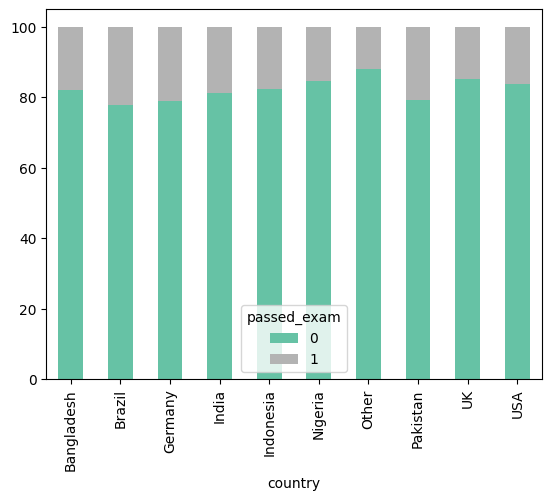

In [182]:
# 1. Creamos la tabla de frecuencias (crosstab)
# 2. Normalizamos por filas (index) para obtener porcentajes
# 3. Graficamos con kind="bar" y stacked=True
(pd.crosstab(df['country'], df['passed_exam'], normalize='index') * 100).plot(
    kind='bar', 
    stacked=True, 

    colormap="Set2"
)

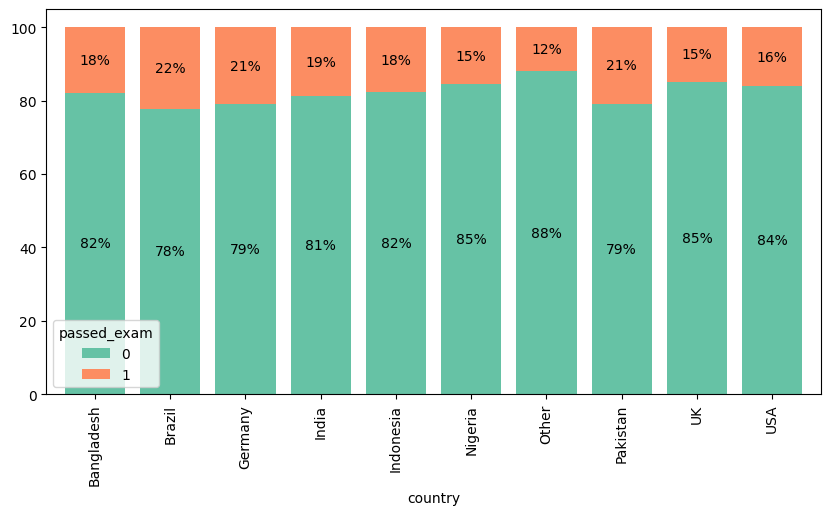

In [240]:
fig, ax = plt.subplots(figsize = (10,5))
tabla = pd.crosstab(df["country"], df["passed_exam"], normalize = "index")*100
tabla.plot(kind = "bar", stacked = True, width = 0.8, ax = ax)


for c in ax.containers:
    ax.bar_label(c, fmt='%.0f%%', label_type='center')

<Axes: xlabel='final_exam_score', ylabel='country'>

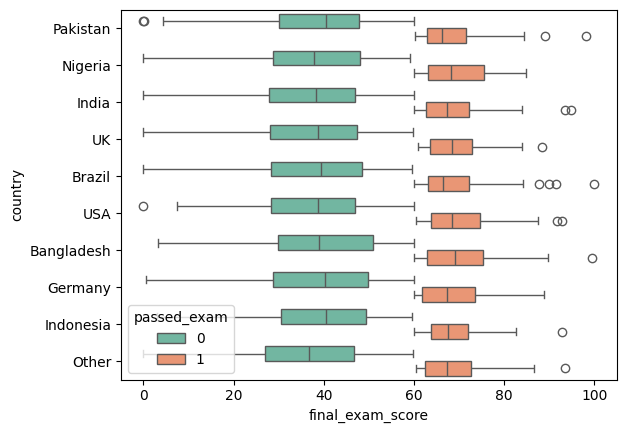

In [129]:
sns.boxplot(df, y = "country", x = "final_exam_score", hue = "passed_exam")

In [250]:
df.columns

Index(['student_id', 'age', 'country', 'prior_programming_experience',
       'weeks_in_course', 'hours_spent_learning_per_week',
       'practice_problems_solved', 'projects_completed',
       'tutorial_videos_watched', 'uses_kaggle',
       'participates_in_discussion_forums', 'debugging_sessions_per_week',
       'self_reported_confidence_python', 'final_exam_score', 'passed_exam'],
      dtype='object')

<Axes: xlabel='hours_spent_learning_per_week', ylabel='Count'>

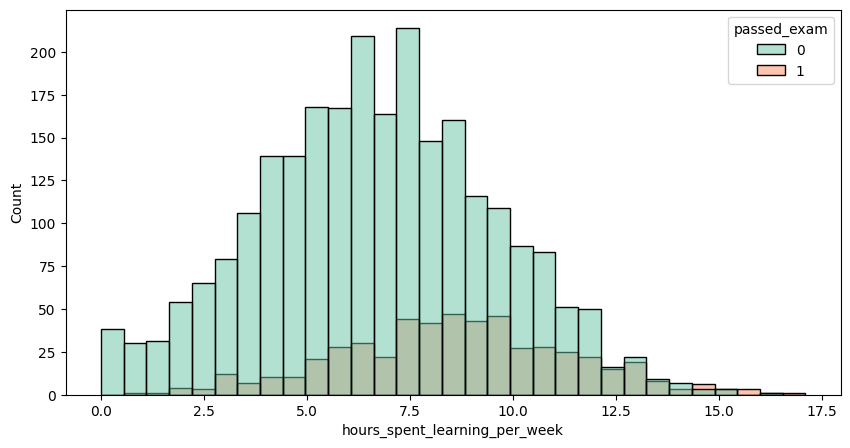

In [251]:
fig, ax = plt.subplots(figsize = (10,5))
sns.histplot(df, x = "hours_spent_learning_per_week", hue = "passed_exam")

<Axes: xlabel='hours_spent_learning_per_week'>

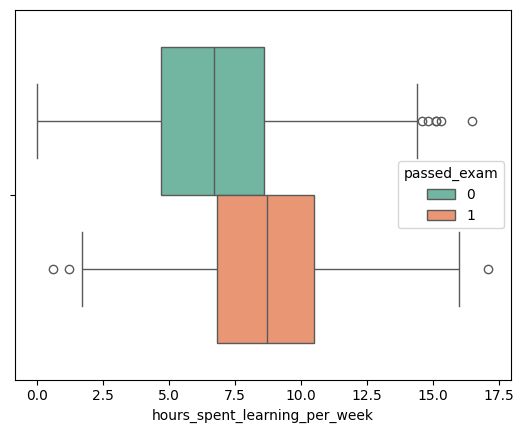

In [256]:
sns.boxplot(df, x = "hours_spent_learning_per_week", hue = "passed_exam")

<Axes: xlabel='self_reported_confidence_python'>

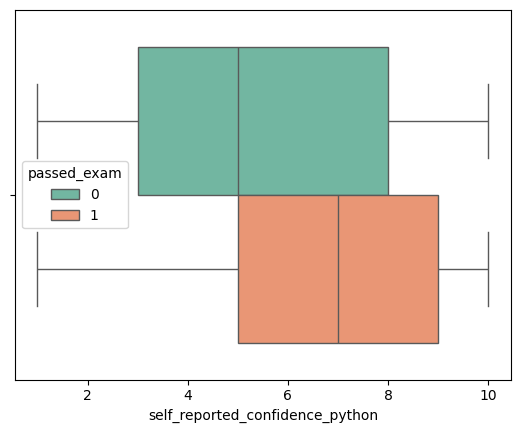

In [257]:
sns.boxplot(df, x = "self_reported_confidence_python", hue = "passed_exam")

In [269]:
var_num = [c for c in df.select_dtypes(include=['number']).columns if df[c].nunique()>2]

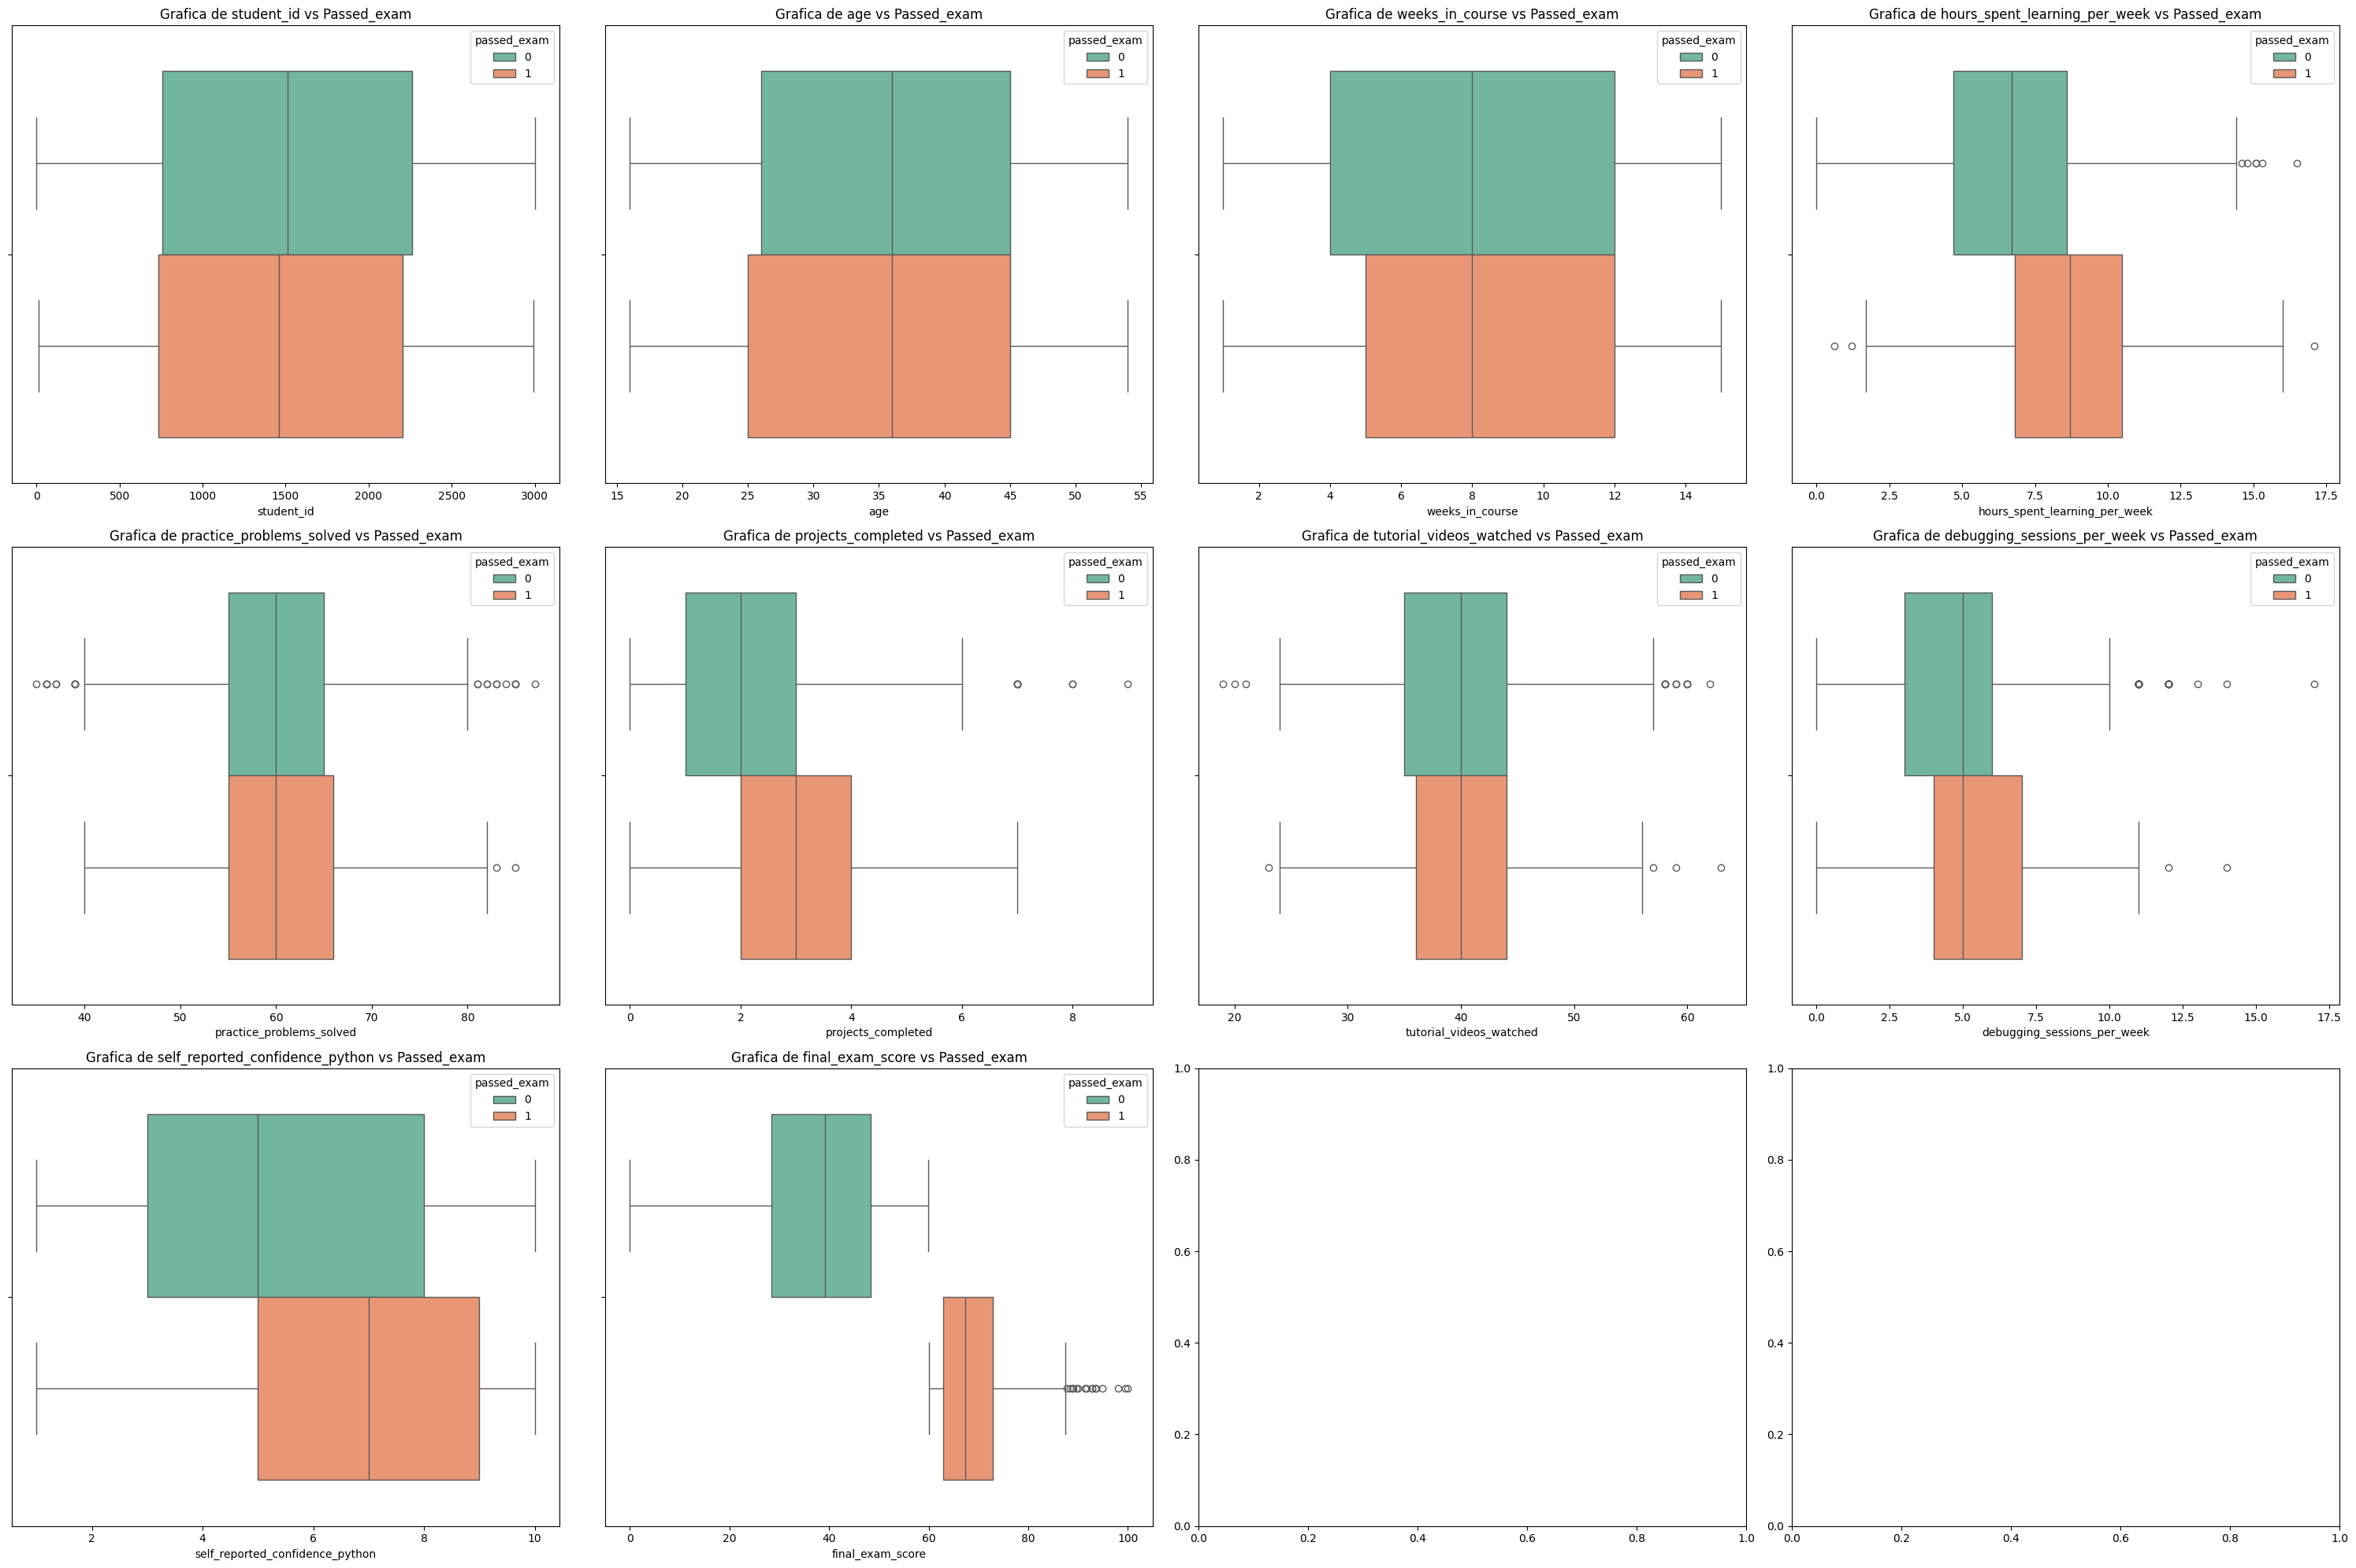

In [273]:
def graficar_boxplot(df, var_num):
    fig , axes = plt.subplots(3,4, figsize = (30,20))
    axes = axes.flatten()

    for i, col in enumerate(df[var_num].columns):
        sns.boxplot(df, x = col, hue = "passed_exam", ax = axes[i])
        axes[i].set_title(f"Grafica de {col} vs Passed_exam")

    plt.tight_layout()


graficar_boxplot(df, var_num)

In [275]:
df[var_num].corr()

student_id       age  weeks_in_course  \
student_id                         1.000000 -0.010812        -0.013231   
age                               -0.010812  1.000000         0.012735   
weeks_in_course                   -0.013231  0.012735         1.000000   
hours_spent_learning_per_week     -0.012650 -0.018902        -0.003977   
practice_problems_solved          -0.004146 -0.004112         0.008241   
projects_completed                -0.049109 -0.007976         0.021097   
tutorial_videos_watched           -0.028274 -0.009739         0.004265   
debugging_sessions_per_week        0.018330 -0.032683         0.006126   
self_reported_confidence_python   -0.011951 -0.012651         0.013991   
final_exam_score                   0.010568 -0.023117         0.008417   

                                 hours_spent_learning_per_week  \
student_id                                           -0.012650   
age                                                  -0.018902   
weeks_in_course                                      -0.003977   
hours_spent_learning_per_week                         1.000000   
practice_problems_solved                             -0.010991   
projects_completed                                    0.012446   
tutorial_videos_watched                               0.017746   
debugging_sessions_per_week                          -0.009773   
self_reported_confidence_python                      -0.001074   
final_exam_score                                      0.365296   

                                 practice_problems_solved  projects_completed  \
student_id                                      -0.004146           -0.049109   
age                                             -0.004112           -0.007976   
weeks_in_course                                  0.008241            0.021097   
hours_spent_learning_per_week                   -0.010991            0.012446   
practice_problems_solved                         1.000000           -0.026667   
projects_completed                              -0.026667            1.000000   
tutorial_videos_watched                          0.018967           -0.017340   
debugging_sessions_per_week                      0.013717           -0.034702   
self_reported_confidence_python                 -0.006042            0.008259   
final_exam_score                                 0.081669            0.352102   

                                 tutorial_videos_watched  \
student_id                                     -0.028274   
age                                            -0.009739   
weeks_in_course                                 0.004265   
hours_spent_learning_per_week                   0.017746   
practice_problems_solved                        0.018967   
projects_completed                             -0.017340   
tutorial_videos_watched                         1.000000   
debugging_sessions_per_week                    -0.012645   
self_reported_confidence_python                 0.031414   
final_exam_score                                0.028922   

                                 debugging_sessions_per_week  \
student_id                                          0.018330   
age                                                -0.032683   
weeks_in_course                                     0.006126   
hours_spent_learning_per_week                      -0.009773   
practice_problems_solved                            0.013717   
projects_completed                                 -0.034702   
tutorial_videos_watched                            -0.012645   
debugging_sessions_per_week                         1.000000   
self_reported_confidence_python                     0.007817   
final_exam_score                                    0.092876   

                                 self_reported_confidence_python  \
student_id                                             -0.011951   
age                                                    -0.012651   
weeks_in_course              

<Axes: >

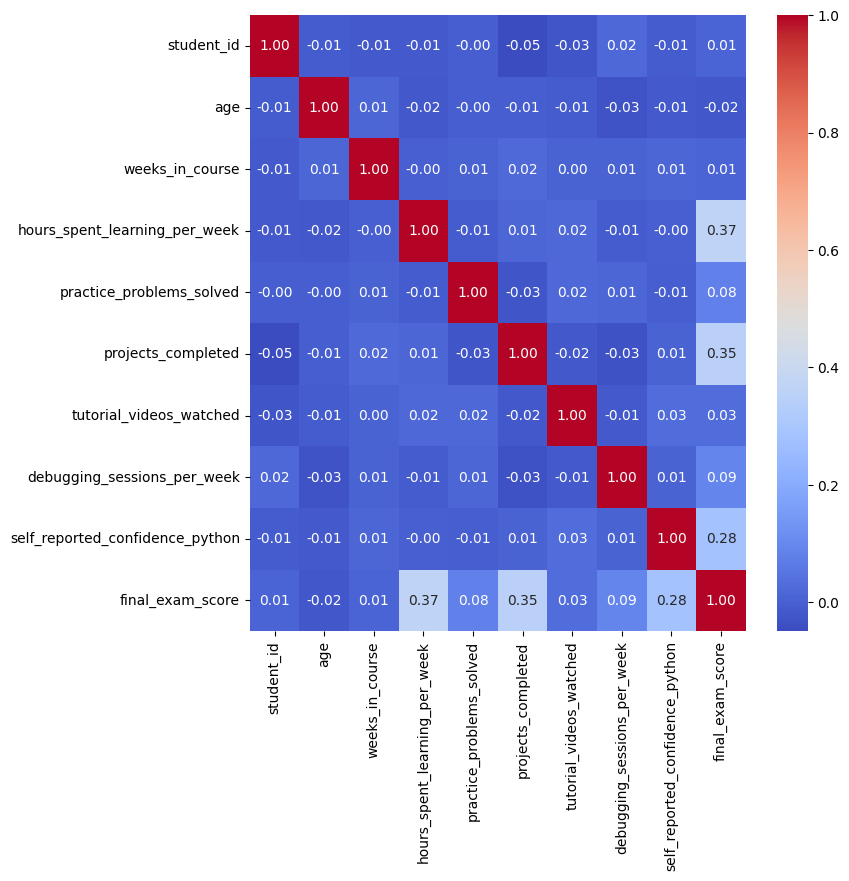

In [283]:
fig , _ = plt.subplots(figsize = (8,8))
sns.heatmap(df[var_num].corr(), annot = True,
            fmt = ".2f",
            cmap = "coolwarm")

In [243]:
var_num = df.select_dtypes("number").columns
var_cat = df.select_dtypes("object").columns

In [247]:
print(var_num)
print(var_cat)

Index(['student_id', 'age', 'weeks_in_course', 'hours_spent_learning_per_week',
       'practice_problems_solved', 'projects_completed',
       'tutorial_videos_watched', 'uses_kaggle',
       'participates_in_discussion_forums', 'debugging_sessions_per_week',
       'self_reported_confidence_python', 'final_exam_score', 'passed_exam'],
      dtype='object')
Index(['country', 'prior_programming_experience'], dtype='object')


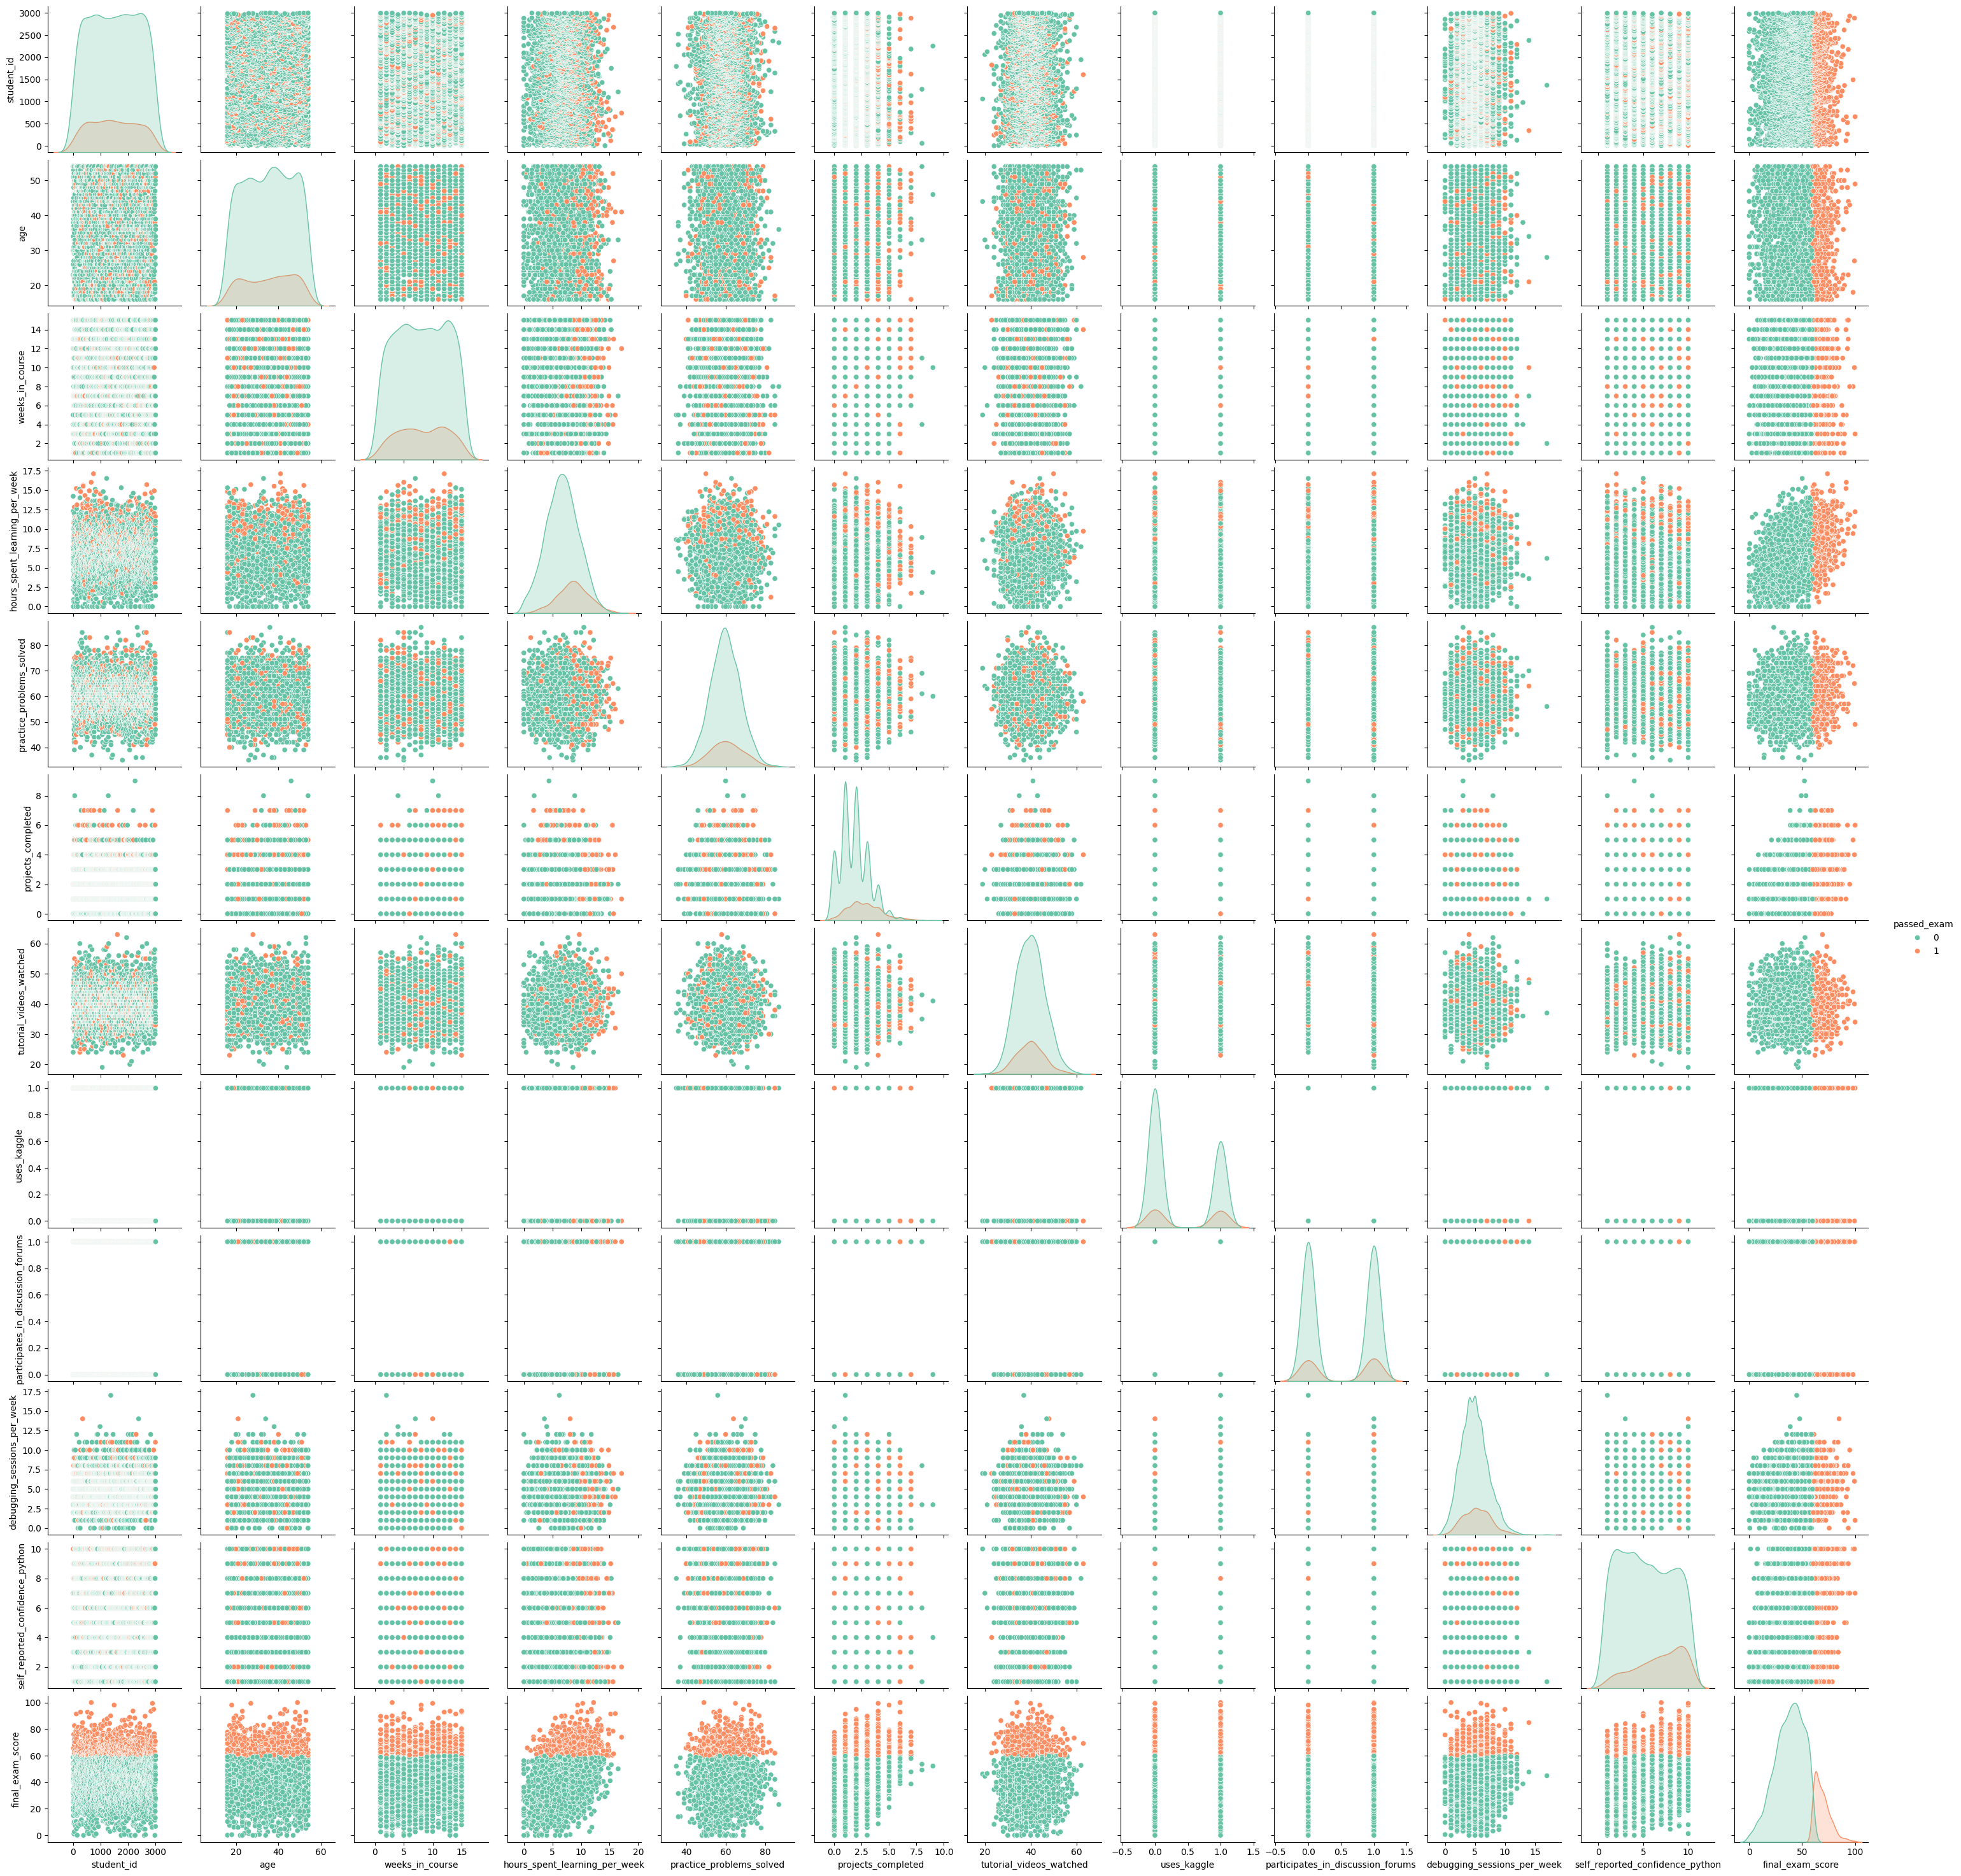

In [246]:
sns.pairplot(df[var_num], hue = "passed_exam")

## Carga de datos

## Graficas